In [35]:
from datetime import datetime
from pandas import DataFrame, concat
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn import preprocessing
from tkinter import Tk
from tkinter.filedialog import askopenfilename

import pandas as pd


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


Tk().withdraw()
filename = askopenfilename()

dataset = pd.read_csv(filename, header=0)
dataset["TIME_STAMP"] = dataset["TIME_STAMP"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").timestamp())
dataset.set_index("TIME_STAMP", inplace=True)
for index, row in dataset.iterrows():
    if "Dispositivo di emergenza inserito (GE0E16)" in row[4]:
        dataset.drop(index, axis=0, inplace=True)
dataset["ST_MACH_EMERG_DESC"] = preprocessing.LabelEncoder().fit_transform(dataset["ST_MACH_EMERG_DESC"])
dataset = dataset[[c for c in dataset if c not in ["ST_MACH_EMERG_DESC"]] + ["ST_MACH_EMERG_DESC"]]
dataset

,METRI_LAVORATI_PARZ,METRI_LAVORATI_TOT,NUM_PASSAGGI_PARZ,NUM_PASSAGGI_TOT,ST_MACH_FULL,ST_MACH_ON,ST_MACH_POT,ST_MACH_STANDBY,ST_MACH_WORK,TEMP_LAMPADA_IRL,TEMP_RULLO_EVA,TEMP_RULLO_PU,TEMP_VASCA_EVA,TEMP_VASCA_PU,VELOCITA_CG,ST_MACH_EMERG_DESC
TIME_STAMP,,,,,,,,,,,,,,,,
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,69,69,70,70,0,4
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,88,88,91,91,0,4
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,105,105,109,109,0,0
1.656491e+09,0,3148,0,5182,0,1,1,1,0,28,118,118,124,124,0,0
1.656491e+09,0,3148,0,5182,0,1,1,1,0,29,130,130,138,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.657715e+09,111,3608,200,5765,0,1,1,1,0,34,200,200,189,189,0,5
1.657715e+09,113,3610,204,5769,1,1,1,0,1,34,199,199,189,189,18,5
1.657715e+09,118,3614,212,5777,1,1,1,0,1,34,200,200,190,190,18,5


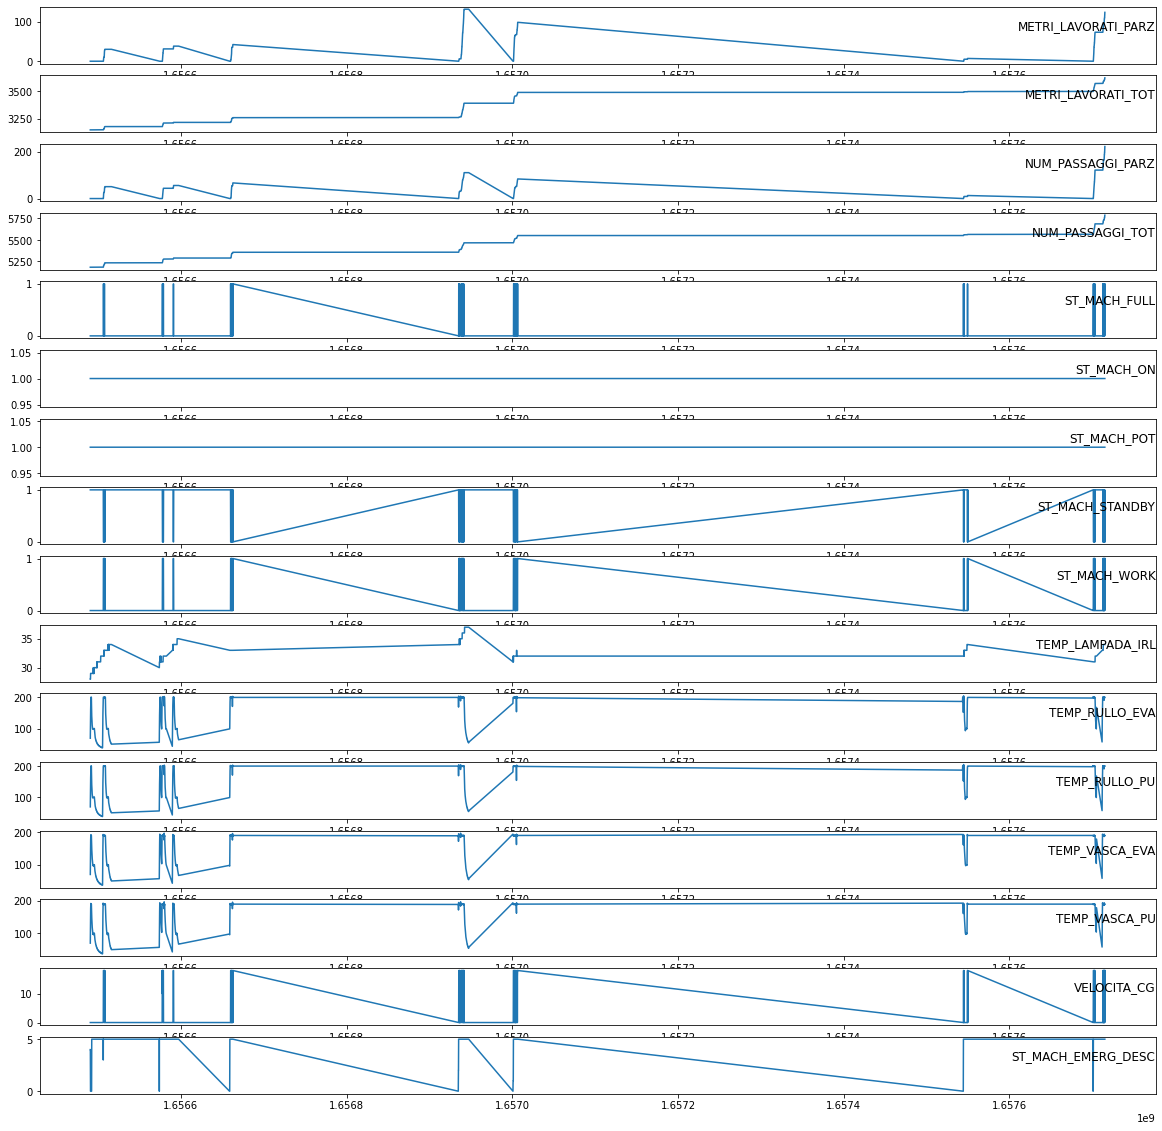

In [36]:
values = dataset.values
i = 1
pyplot.figure(figsize=(20, 20))
columns = range(len(dataset.columns))
for col in columns:
    pyplot.subplot(len(columns), 1, i)
    pyplot.plot(dataset.index.values, values[:, col])
    pyplot.title(dataset.columns[col], y=0.5, loc='right')
    i += 1
pyplot.show()

In [37]:
values = dataset.values
values = values.astype('float32')
values

array([[   0., 3148.,    0., ...,   70.,    0.,    4.],
       [   0., 3148.,    0., ...,   91.,    0.,    4.],
       [   0., 3148.,    0., ...,  109.,    0.,    0.],
       ...,
       [ 118., 3614.,  212., ...,  190.,   18.,    5.],
       [ 120., 3617.,  217., ...,  190.,   18.,    5.],
       [ 123., 3620.,  223., ...,  190.,   18.,    5.]], dtype=float32)

In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.        , 0.        , 0.        , ..., 0.20625   , 0.        ,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.33750004, 0.        ,
        0.8       ],
       [0.        , 0.        , 0.        , ..., 0.45000005, 0.        ,
        0.        ],
       ...,
       [0.90076333, 0.987288  , 0.9506727 , ..., 0.95625   , 1.        ,
        1.        ],
       [0.9160305 , 0.99364376, 0.9730942 , ..., 0.95625   , 1.        ,
        1.        ],
       [0.9389313 , 1.        , 1.        , ..., 0.95625   , 1.        ,
        1.        ]], dtype=float32)

In [39]:
reframed = series_to_supervised(scaled, 10, 1)
reframed

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var9(t-10),var10(t-10),...,var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t)
10,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.111111,0.898204,0.898204,0.96875,0.96875,0.0,0.0
11,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.111111,0.928144,0.928144,0.96250,0.96250,0.0,0.0
12,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.111111,0.952096,0.952096,0.95625,0.95625,0.0,0.0
13,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.111111,0.970060,0.970060,0.95625,0.95625,0.0,0.0
14,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.111111,...,0.0,1.0,0.0,0.111111,0.970060,0.970060,0.95000,0.95000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.725191,0.940678,0.748879,0.907591,1.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,1.0,0.0,0.666667,0.970060,0.970060,0.95000,0.95000,0.0,1.0
1267,0.755725,0.947034,0.780269,0.919142,1.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,0.0,1.0,0.666667,0.964072,0.964072,0.95000,0.95000,1.0,1.0
1268,0.778626,0.953390,0.807175,0.929043,1.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,0.0,1.0,0.666667,0.970060,0.970060,0.95625,0.95625,1.0,1.0
1269,0.793893,0.957627,0.825112,0.935644,0.0,0.0,0.0,0.0,1.0,0.666667,...,0.0,0.0,1.0,0.666667,0.970060,0.970060,0.95625,0.95625,1.0,1.0


In [40]:
values = reframed.values
n_train_hours = 1200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :160], train[:, -16]
test_X, test_y = test[:, :160], test[:, -16]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 10, 16))
test_X = test_X.reshape((test_X.shape[0], 10, 16))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 10, 16) (1200,) (61, 10, 16) (61,)


In [1]:
from keras.layers import LSTM, Dense
from keras import Sequential

# design network
model = Sequential()
model.add(LSTM(45, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(45, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=1,
                    shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: name 'train_X' is not defined

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import concatenate

yhat = model.predict(test_X)
test_X_reshaped = test_X.reshape((test_X.shape[0], 160))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X_reshaped[:, -15:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y_reshaped, test_X_reshaped[:, -15:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

2/2 [==============================] - 0s 10ms/step
Test RMSE: 21.617
